In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

### DT with iris
- decision tree

In [5]:
import pandas as pd

In [6]:
iris_pd = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
iris_pd['species'] = iris.target

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

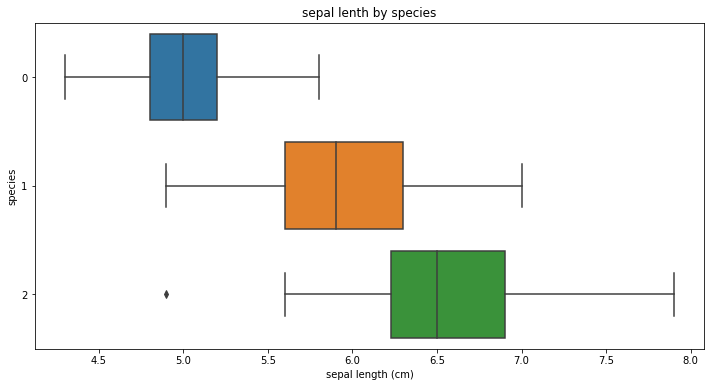

In [10]:
plt.figure(figsize = (12,6))
plt.title('sepal lenth by species')
sns.boxplot(x = iris.feature_names[0], y = 'species', data = iris_pd, orient = 'h')
plt.show()

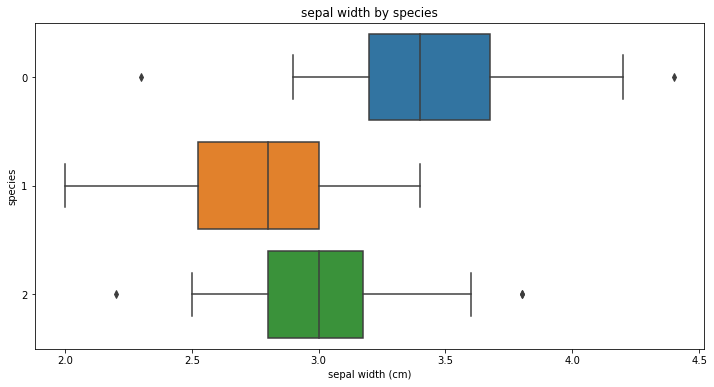

In [11]:
plt.figure(figsize = (12,6))
plt.title('sepal width by species')
sns.boxplot(x = iris.feature_names[1], y = 'species', data = iris_pd, orient = 'h')
plt.show()

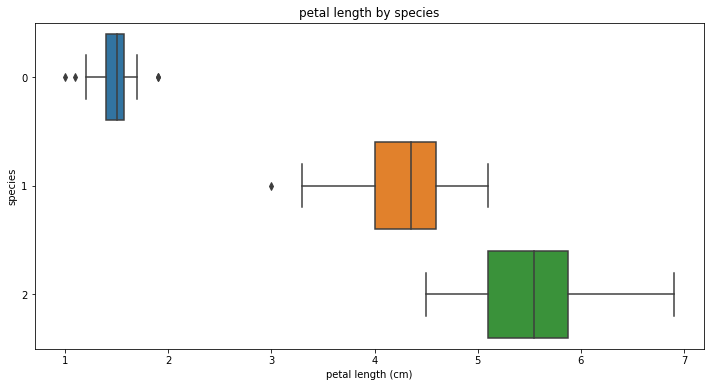

In [12]:
plt.figure(figsize = (12,6))
plt.title('petal length by species')
sns.boxplot(x = iris.feature_names[2], y = 'species', data = iris_pd, orient = 'h')
plt.show()

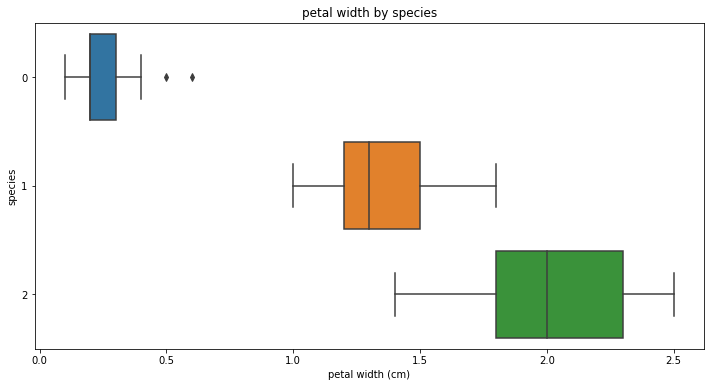

In [13]:

plt.figure(figsize = (12,6))
plt.title('petal width by species')
sns.boxplot(x = iris.feature_names[3], y = 'species', data = iris_pd, orient = 'h')
plt.show()

<Figure size 864x432 with 0 Axes>

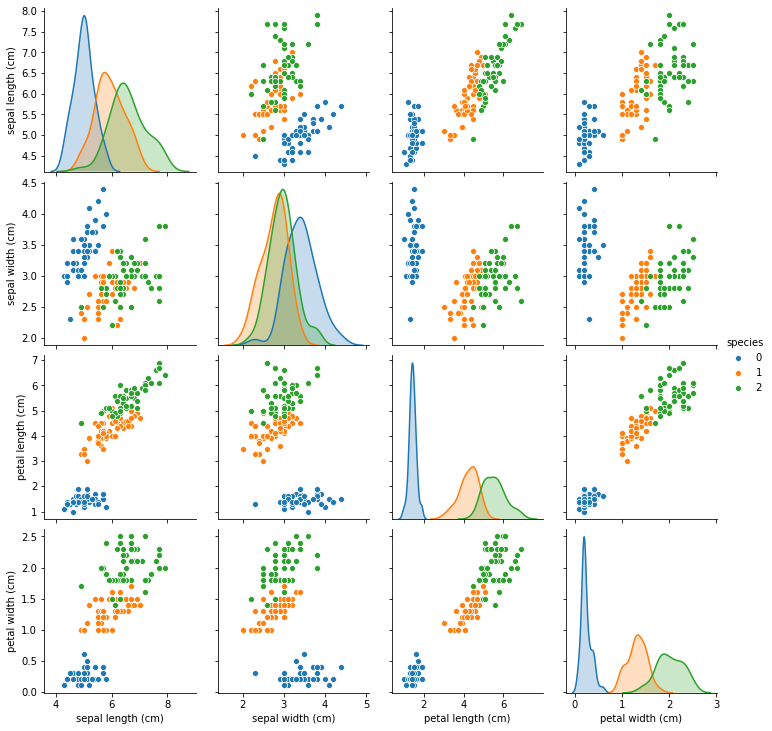

In [14]:
plt.figure(figsize  = (12,6))
sns.pairplot(iris_pd, hue = 'species')
plt.show()

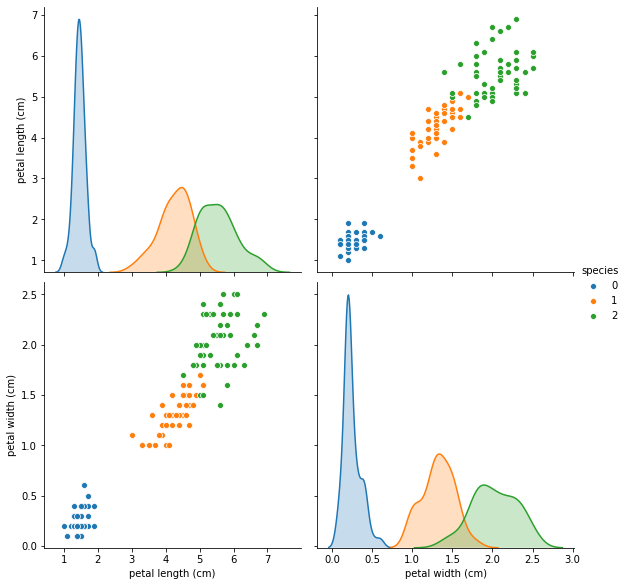

In [15]:
sns.pairplot(data = iris_pd, vars = [iris.feature_names[2], iris.feature_names[3]], hue = 'species', height = 4)
plt.show()

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

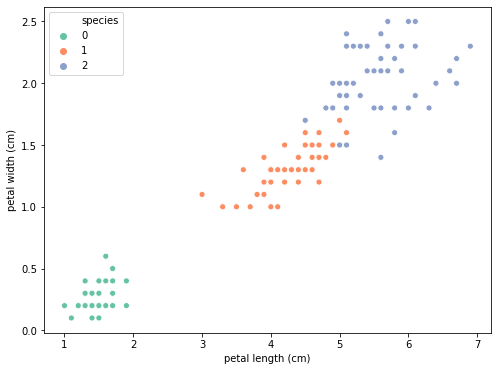

In [17]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = iris_pd, x = iris.feature_names[2], y = iris.feature_names[3], hue = 'species',
               palette= 'Set2')
plt.show()

In [18]:
#0은 어차피 잘 구분되어 있으니 나머지에 대해 구분하자

In [19]:
iris_12 = iris_pd[iris_pd['species']!= 0]
iris_12.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


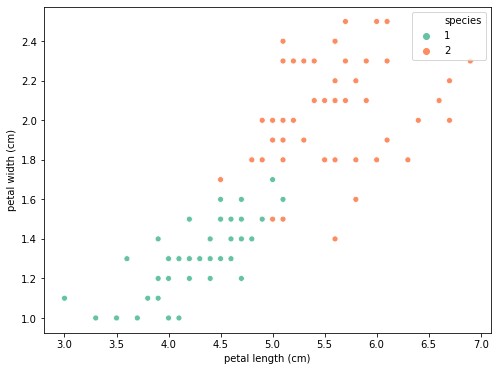

In [20]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = iris_12, x = iris.feature_names[2], y = iris.feature_names[3], hue = 'species',
               palette= 'Set2')
plt.show()

In [21]:
import numpy as np

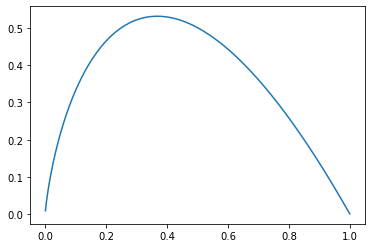

In [22]:
p = np.arange(0.001,1,0.001)
plt.plot(p, -p*np.log2(p))

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
iris_tree = DecisionTreeClassifier()
iris_tree.fit(iris.data[:, 2:], iris.target)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_pred_tr = iris_tree.predict(iris.data[:,2:])
accuracy_score(iris.target,y_pred_tr)

0.9933333333333333

In [32]:
from graphviz import Source
from sklearn.tree import export_graphviz

In [33]:
Source(export_graphviz(iris_tree, feature_names = ['length','width'], class_names = iris.target_names, rounded = True, filled = True))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH